In [ ]:
import easyvvuq as uq
import os
from custom import CustomEncoder
import numpy as np
import pandas as pd

In [ ]:
home = '/Users/robertsinclair/codes/FabSim3/plugins/FabCovidsim/adaptive_robbie2'
output_columns = ["cumDeath"]
work_dir = '~/postdoc1/covid/campaigns'
config = 'disease_adaptive'

In [3]:
# load campagin state
campaign = uq.Campaign(state_file="covid_easyvvuq_state.json", 
                       work_dir=work_dir)
sampler = campaign.get_active_sampler()
sampler.load_state("covid_sampler_state.pickle")
campaign.set_sampler(sampler)
analysis = uq.analysis.SCAnalysis(sampler=sampler, qoi_cols=output_columns)
analysis.load_state("covid_analysis_state.pickle")
sampler = campaign.get_active_sampler()
sampler.load_state("covid_sampler_state.pickle")

Loading sampler state from covid_sampler_state.pickle
Loading analysis state from covid_analysis_state.pickle
Loading sampler state from covid_sampler_state.pickle


In [4]:
# make the input parameters more readable for a journal paper

params = list(analysis.sampler.vary.get_keys())
params[9] = 'Relative_transmission_rates_for elementary schools'
params[10] = 'Relative_transmission_rates_for high schools'
params[11] = 'Relative_transmission_rates_for universities'
params[12] = 'Relative_transmission_rates_for office/workplace'
params[13] = 'Relative_spatial_contact_rates_by_age'

for i,param in enumerate(params):
    params[i] = param.replace('_',' ')

# Table of params

This is just a pandas dataframe, this will be specific to each group so make it by whatever means neccesary 

In [5]:
defaults = {
        "Symptomatic_infectiousness_relative_to_asymptomatic": 1.75,
        "Proportion_symptomatic": 0.6,
        "Latent_period": 5,
        "Mortality_factor": 1.0,
        "Reproduction_number": None,
        "Infectious_period": 13.55,
        "Household_attack_rate": 0.145,
        "Household_transmission_denominator_power": 0.8,
        "Delay_from_end_of_latent_period_to_start_of_symptoms": 0.75,
        "Relative_transmission_rates_for_place_types0": 0.115,
        "Relative_transmission_rates_for_place_types1": 0.115,
        "Relative_transmission_rates_for_place_types2": 0.075,
        "Relative_transmission_rates_for_place_types3": 0.06,
        "Relative_spatial_contact_rates_by_age_power": 2.125
}
choice = {
        "Symptomatic_infectiousness_relative_to_asymptomatic": 'Literature',
        "Proportion_symptomatic": 'Literature',
        "Latent_period": 'Literature',
        "Mortality_factor": '+/- 20%',
        "Reproduction_number": 'Literature',
        "Infectious_period": 'Literature',
        "Household_attack_rate": 'Suggested by Imperial',
        "Household_transmission_denominator_power": 'Suggested by Imperial',
        "Delay_from_end_of_latent_period_to_start_of_symptoms": 'Literature',
        "Relative_transmission_rates_for_place_types0": 'Suggested by Imperial',
        "Relative_transmission_rates_for_place_types1": 'Suggested by Imperial',
        "Relative_transmission_rates_for_place_types2": 'Suggested by Imperial',
        "Relative_transmission_rates_for_place_types3": 'Suggested by Imperial',
        "Relative_spatial_contact_rates_by_age_power": 'Suggested by Imperial'
}

In [6]:
adapt_measure = np.max(analysis.l_norm, axis=0)

In [8]:
data = {
    'default':[],
    'min':[],
    'max':[],
    'reason for range':[],
    'max quadrature order':[],
}
index = []

for i, (key, dist) in enumerate(analysis.sampler.vary.vary_dict.items()):
    data['min'] += [dist.lower]
    data['max'] += [dist.upper]
    data['max quadrature order'] += [adapt_measure[i]]
    data['default'] += [defaults[key]]
    data['reason for range'] += [choice[key]]
data['min'] = [float(x) for x in data['min']]
data['max'] = [float(x) for x in data['max']]
    
data = pd.DataFrame(data, index=params)
data.sort_values('max quadrature order', ascending=False)

print(data.to_latex())

\begin{tabular}{lrrrlr}
\toprule
{} &  default &    min &    max &       reason for range &  max quadrature order \\
\midrule
Symptomatic infectiousness relative to asymptom... &    1.750 &   1.00 &   2.00 &             Literature &                     2 \\
Proportion symptomatic                             &    0.600 &   0.40 &   0.80 &             Literature &                     3 \\
Latent period                                      &    5.000 &   3.00 &   6.00 &             Literature &                     2 \\
Mortality factor                                   &    1.000 &   0.80 &   1.20 &                +/- 20\% &                     1 \\
Reproduction number                                &      NaN &   2.00 &   2.70 &             Literature &                     2 \\
Infectious period                                  &   13.550 &  11.50 &  15.60 &             Literature &                     1 \\
Household attack rate                              &    0.145 &   0.10 &   0.19 &

# Sobol indeces

First run the analysis, this will take a while. Then plot the first order sobol indeces.

Then calculate the total sobol indeces, this also takes a while and gives a better idea of the total importance of a parameter. 

In [9]:
campaign.apply_analysis(analysis)
results = campaign.get_last_analysis()

computing combination coefficients...
done
Computing collocation points and level indices...
done.
Loading samples...
done
Computing moments...
done
Computing PCE coefficients...
Computing coeffienct 1 of 1
Computing coeffienct 1 of 2
Computing coeffienct 2 of 2
Computing coeffienct 1 of 2
Computing coeffienct 2 of 2
Computing coeffienct 1 of 4
Computing coeffienct 2 of 4
Computing coeffienct 3 of 4
Computing coeffienct 4 of 4
Computing coeffienct 1 of 2
Computing coeffienct 2 of 2
Computing coeffienct 1 of 4
Computing coeffienct 2 of 4
Computing coeffienct 3 of 4
Computing coeffienct 4 of 4
Computing coeffienct 1 of 4
Computing coeffienct 2 of 4
Computing coeffienct 3 of 4
Computing coeffienct 4 of 4
Computing coeffienct 1 of 8
Computing coeffienct 2 of 8
Computing coeffienct 3 of 8
Computing coeffienct 4 of 8
Computing coeffienct 5 of 8
Computing coeffienct 6 of 8
Computing coeffienct 7 of 8
Computing coeffienct 8 of 8
Computing coeffienct 1 of 2
Computing coeffienct 2 of 2
Computing

Computing coeffienct 17 of 32
Computing coeffienct 18 of 32
Computing coeffienct 19 of 32
Computing coeffienct 20 of 32
Computing coeffienct 21 of 32
Computing coeffienct 22 of 32
Computing coeffienct 23 of 32
Computing coeffienct 24 of 32
Computing coeffienct 25 of 32
Computing coeffienct 26 of 32
Computing coeffienct 27 of 32
Computing coeffienct 28 of 32
Computing coeffienct 29 of 32
Computing coeffienct 30 of 32
Computing coeffienct 31 of 32
Computing coeffienct 32 of 32
Computing coeffienct 1 of 3
Computing coeffienct 2 of 3
Computing coeffienct 3 of 3
Computing coeffienct 1 of 6
Computing coeffienct 2 of 6
Computing coeffienct 3 of 6
Computing coeffienct 4 of 6
Computing coeffienct 5 of 6
Computing coeffienct 6 of 6
Computing coeffienct 1 of 6
Computing coeffienct 2 of 6
Computing coeffienct 3 of 6
Computing coeffienct 4 of 6
Computing coeffienct 5 of 6
Computing coeffienct 6 of 6
Computing coeffienct 1 of 12
Computing coeffienct 2 of 12
Computing coeffienct 3 of 12
Computing coe

Computing coeffienct 8 of 8
Computing coeffienct 1 of 16
Computing coeffienct 2 of 16
Computing coeffienct 3 of 16
Computing coeffienct 4 of 16
Computing coeffienct 5 of 16
Computing coeffienct 6 of 16
Computing coeffienct 7 of 16
Computing coeffienct 8 of 16
Computing coeffienct 9 of 16
Computing coeffienct 10 of 16
Computing coeffienct 11 of 16
Computing coeffienct 12 of 16
Computing coeffienct 13 of 16
Computing coeffienct 14 of 16
Computing coeffienct 15 of 16
Computing coeffienct 16 of 16
Computing coeffienct 1 of 16
Computing coeffienct 2 of 16
Computing coeffienct 3 of 16
Computing coeffienct 4 of 16
Computing coeffienct 5 of 16
Computing coeffienct 6 of 16
Computing coeffienct 7 of 16
Computing coeffienct 8 of 16
Computing coeffienct 9 of 16
Computing coeffienct 10 of 16
Computing coeffienct 11 of 16
Computing coeffienct 12 of 16
Computing coeffienct 13 of 16
Computing coeffienct 14 of 16
Computing coeffienct 15 of 16
Computing coeffienct 16 of 16
Computing coeffienct 1 of 32
C

/Users/robertsinclair/anaconda3/envs/easyvvuq/lib/python3.6/site-packages/easyvvuq-0.5.3+19.gd25e346-py3.6.egg/easyvvuq/analysis/sc_analysis.py:1037: RuntimeWarning: invalid value encountered in true_divide


In [10]:
sobols_first = results["sobols_first"][output_columns[0]]

In [ ]:
# plot first order sobol indeces by time

import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure()

x = range(801)
for i,v in enumerate(sobols_first):
    y = sobols_first[v]
    important = False
    if y[-1] > 0.001:
        ax = sns.lineplot(x=x,y=sobols_first[v],label=params[i])

plt.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0.)
plt.xlabel('Days')
plt.ylabel('First order Sobol index')

In [ ]:
mean, D, S_u = analysis.get_pce_sobol_indices('cumDeath','all')

In [ ]:
# plot total sobal index for each variable 
sns.set_palette("colorblind")
plt.figure()
x = range(801)
S_T = {i:np.zeros(801) for i in range(14)}

for key in S_u.keys():
    for index in key:
        S_T[index] += S_u[key]
        
for i,label in enumerate(sobols_first):
    y = S_T[i]
    if y[-1] > 0.02:
        sns.lineplot(x=x,y=y,label=params[i])
    
plt.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0.)
plt.xlabel('Days')
plt.ylabel('Total Sobol index')   

In [ ]:
# this is useful to check if there are some significant high order interactions
for key in S_u.keys():
    if S_u[key][-1] > 0.01:
         print(key, S_u[key][-1])
            
print('\n key:')
for i,label in enumerate(sobols_first):
    print(i,label)

# Cumulitive deaths 

I've modified wouters code from easyvvuq to generate 2 confidence intervals in one ensemble. 

In [11]:
def get_confidence_intervals(self, qoi, n_samples, conf1=0.36, conf2=0.9):
        """
        Compute the confidence intervals based upon samples of the SC surrogate.
        Uses a non-parametric approach based upon the empirical cumulative
        distribution function.

        Parameters:
        -----------
        qoi (str): name of the Quantity of Interest for which to compute the intervals
        n_samples (int): number of surrogate samples to be used in the computation
        conf (float in [0, 1]): the confidence interval magnitude

        Returns:
        --------
        lower, upper (array of floats): the upper and lower bound of the interval
        """

        #lower bound = alpha, upper bound = 1 - alpha 
        alpha1 = 0.5*(1.0 - conf1)
        alpha2 = 0.5*(1.0 - conf2)

        #draw n_samples draws from the input distributions
        xi_mc = np.zeros([n_samples, self.N])
        idx = 0
        for dist in self.sampler.vary.get_values():
            xi_mc[:, idx] = dist.sample(n_samples)
            idx += 1

        #sample the surrogate n_samples times
        surr_samples = np.zeros([n_samples, self.N_qoi])
        print('Sampling surrogate %d times' % (n_samples,))
        for i in range(n_samples):
            surr_samples[i, :] = self.surrogate(qoi, xi_mc[i])
            if np.mod(i, 100) == 0:
                print('%d of %d' % (i + 1, n_samples))
        print('done')

        #arrays for lower and upper bound of the interval
        lower = np.zeros(self.N_qoi)
        upper = np.zeros(self.N_qoi)

        #the probabilities of the ecdf
        prob = np.linspace(0, 1, n_samples)
        #the closest locations in prob that correspond to the interval bounds
        idx10 = np.where(prob <= alpha1)[0][-1]
        idx11 = np.where(prob <= 1.0 - alpha1)[0][-1]
        idx20 = np.where(prob <= alpha2)[0][-1]
        idx21 = np.where(prob <= 1.0 - alpha2)[0][-1]
        
        lower1 = np.zeros(self.N_qoi)
        lower2 = np.zeros(self.N_qoi)
        upper1 = np.zeros(self.N_qoi)
        upper2 = np.zeros(self.N_qoi)
        
        #for every location of qoi compute the ecdf-based confidence interval
        for i in range(self.N_qoi):
            #the sorted surrogate samples at the current location
            samples_sorted = np.sort(surr_samples[:, i])
            #the corresponding confidence interval
            lower1[i] = samples_sorted[idx10]
            upper1[i] = samples_sorted[idx11]
            lower2[i] = samples_sorted[idx20]
            upper2[i] = samples_sorted[idx21]
       
        total_deaths = surr_samples[:, -1]
        
        return lower1, upper1, lower2, upper2, total_deaths


In [12]:
lower1, upper1, lower2, upper2, total_deaths = get_confidence_intervals(analysis, 'cumDeath', 1000)

Sampling surrogate 1000 times
1 of 1000
101 of 1000
201 of 1000
301 of 1000
401 of 1000
501 of 1000
601 of 1000
701 of 1000
801 of 1000
901 of 1000
done


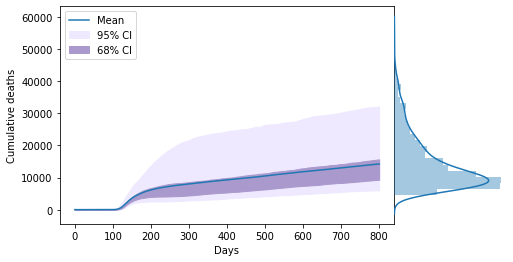

In [14]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

x = range(801)

fig = plt.figure(figsize=(8,4))
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[3, 1])

ax1 = fig.add_subplot(spec[0])
ax2 = fig.add_subplot(spec[1], sharey=ax1)
ax2.get_xaxis().set_ticks([])
fig.subplots_adjust(wspace=0)
plt.setp(ax2.get_yticklabels(), visible=False)

ax1.fill_between(x, lower2, upper2, color='#eee9ff', label='95% CI')
ax1.fill_between(x, lower1, upper1, color='#aa99cc', label='68% CI')
mean = results["statistical_moments"][output_columns[0]]["mean"]
ax1.plot(x,mean, label='Mean')
ax1.legend(loc="upper left")

ax1.set_xlabel('Days')
ax1.set_ylabel('Cumulative deaths')
ax2.set_xlabel('Frequency')
#ax2.set_title('Total deaths distribution')
ax2.axis('off')

ax2 = sns.distplot(total_deaths, vertical=True)

In [15]:
total_deaths.mean()

14473.879314383596

In [16]:
total_deaths.std()

8214.085065890582

In [17]:
from scipy.stats import skew, kurtosis
skew(total_deaths)

1.4341722600214732

In [18]:
kurtosis(total_deaths)

1.8833907519850053

In [19]:
from scipy.stats import lognorm
stddev = total_deaths.std()
mean = total_deaths.mean()

dist=lognorm([stddev],loc=mean)

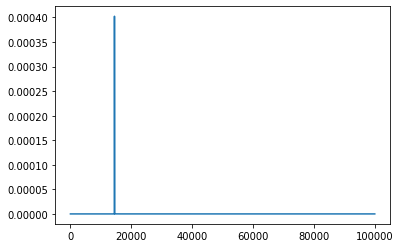

In [21]:
x = range(0,100000)
sns.lineplot(x,dist.pdf(x))

In [29]:
dist.expect()

/Users/robertsinclair/anaconda3/envs/easyvvuq/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2511: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  vals = integrate.quad(fun, lb, ub, **kwds)[0] / invfac


22.554138938629876

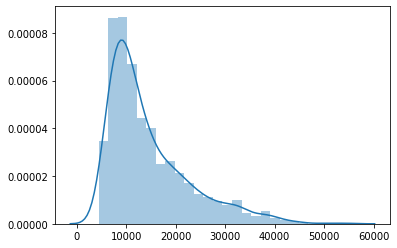

In [30]:
sns.distplot(total_deaths)

1.0000000000000004


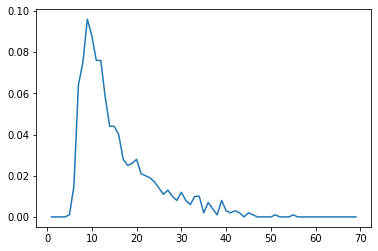

In [115]:
N=70
x = np.arange(1,N)

pdf = np.zeros(len(x))

for count in total_deaths:
    count = round(count/1000)
    pdf[int(count)] += 1

pdf = pdf / (sum(pdf))
print(sum(pdf))

sns.lineplot(x=x,y=pdf)


In [116]:
def lognormal(x,sig,mu):
    factor = 1/(x*sig*np.sqrt(2*np.pi))
    top = (np.log(x) - mu)**2
    bot = 2 * sig * sig
    return factor * np.exp(-top/bot)

In [117]:
from scipy.optimize import curve_fit

a,b = curve_fit(lognormal,x,pdf, p0=[1,2])
a,b

(array([0.43404928, 2.50623374]), array([[1.95045650e-04, 4.23300173e-05],
        [4.23300173e-05, 2.84963101e-04]]))

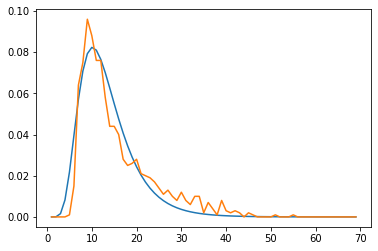

In [118]:
sns.lineplot(x=x, y=lognormal(x,a[0],a[1]))
sns.lineplot(x=x,y=pdf)

In [119]:
def mean(sig, mu):
    return np.exp(mu + sig*sig/2)
mean(*a)

13.469570811293737

In [120]:
skew(lognormal(x,a[0],a[1])),kurtosis(lognormal(x,a[0],a[1]))

(1.6797679300386668, 1.4184461262872725)